<a href="https://colab.research.google.com/github/Arifuzzaman-Munaf/Data-Visualization-Python/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
1. **Install and Import Libraries**
   * Setting up the required dependencies and libraries for data visualization.


2. **Dataset Overview: Immigration to Canada (1980-2013)**
   * Introduction to the dataset and its source.
   * Understanding the structure of the dataset, including columns and data types.
3.**Data Preparation**
   * Setting “Country” as an index for better handling.
   * Checking data types and structure before visualization.
   * Converting year columns to integers for easier processing.
4. **Area Plot Visualization**
   * Identifying the Top 5 Countries with the highest immigration.
   * Transposing the dataset for better visualization.
   * Understanding the impact of using `stacked=False` in an area plot.
   * Exploring how **alpha** affects the interpretation of trends.

# Install and import Libraries

In [74]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Dataset: Immigration to Canada from 1980 to 2013
Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).
The clean and pre-processed dataset for
The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>

<br>
The dataset contains annual data on immigrants to Canada from various countries, categorized by continents and regions, and labeled as either developed or developing regions. The years covered range from 1980 to 2013, with a total sum of immigrants for each country provided in the ‘Total’ column.

---


In [76]:
dataset = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")
dataset.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


As we are going to draw **Area Plot**, we can set Country as index for better understanding.

In [77]:
dataset = dataset.set_index('Country')
dataset.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


It is important to check the datatypes of all columns before any plotting. We should check the shape of dataset as well.

In [78]:
print(dataset.dtypes)
print(dataset.shape)

Continent    object
Region       object
DevName      object
1980          int64
1981          int64
1982          int64
1983          int64
1984          int64
1985          int64
1986          int64
1987          int64
1988          int64
1989          int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
Total         int64
dtype: object
(195, 38)


Since the years(1980-2013) in dataframe are in string and represent columns, we can store the list of columns in a list variable and use it multiple times where needed.

In [79]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Area Plot
To visualize this dataset, we’ll create an area plot for the top 5 countries with the most immigrants to Canada. This visualization will help us understand trends over time and identify which countries have had the highest number of immigrants.

Steps for the Area Plot:
> 1. **Identify the Top 5 Countries**: We’ll sort the countries based on the ‘Total’ column to find the top 5 countries with the most immigrants.
2.	**Data Preparation**: For these top 5 countries, we’ll extract immigration data from 1980 to 2013.
3.	**Visualization**: We’ll use an area plot to visualize the immigration trends over the years for these countries, allowing us to observe the volume and changes in immigration patterns.





In [80]:
#Identify the Top 5 Countries
dataset_top5 = dataset.nlargest(5, 'Total')


We can see that **Country** column is set as index. To prepare our dataset for visualization with an area plot, it is crucial to reformat the data so that each row represents a year as index and each column corresponds to one of the top five countries with the most immigrants. This transposition allows us to better visualize the trends over time for each country

In [81]:
#Data Preparation
dataset_top5 = dataset_top5[years].transpose()
dataset_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


As index values are in Int format, it may be tough to fit them in plot in specific situation. So we will cast the index value in **Int**

In [82]:
dataset_top5.index = dataset_top5.index.map(int)
dataset_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


**Area plots are stacked by default**. To produce an unstacked plot, set parameter stacked to value False.Using **stacked=False** in an area plot ensures that each country’s immigration trends are plotted independently from a common baseline, enhancing clarity and ease of comparison. This setting allows each area to be displayed separately without overlapping, making it easier to observe and analyze the distinct patterns and fluctuations in immigration numbers for each country over the years. It effectively avoids the visual confusion that can arise from stacked layers, providing a clearer, more direct understanding of the data.

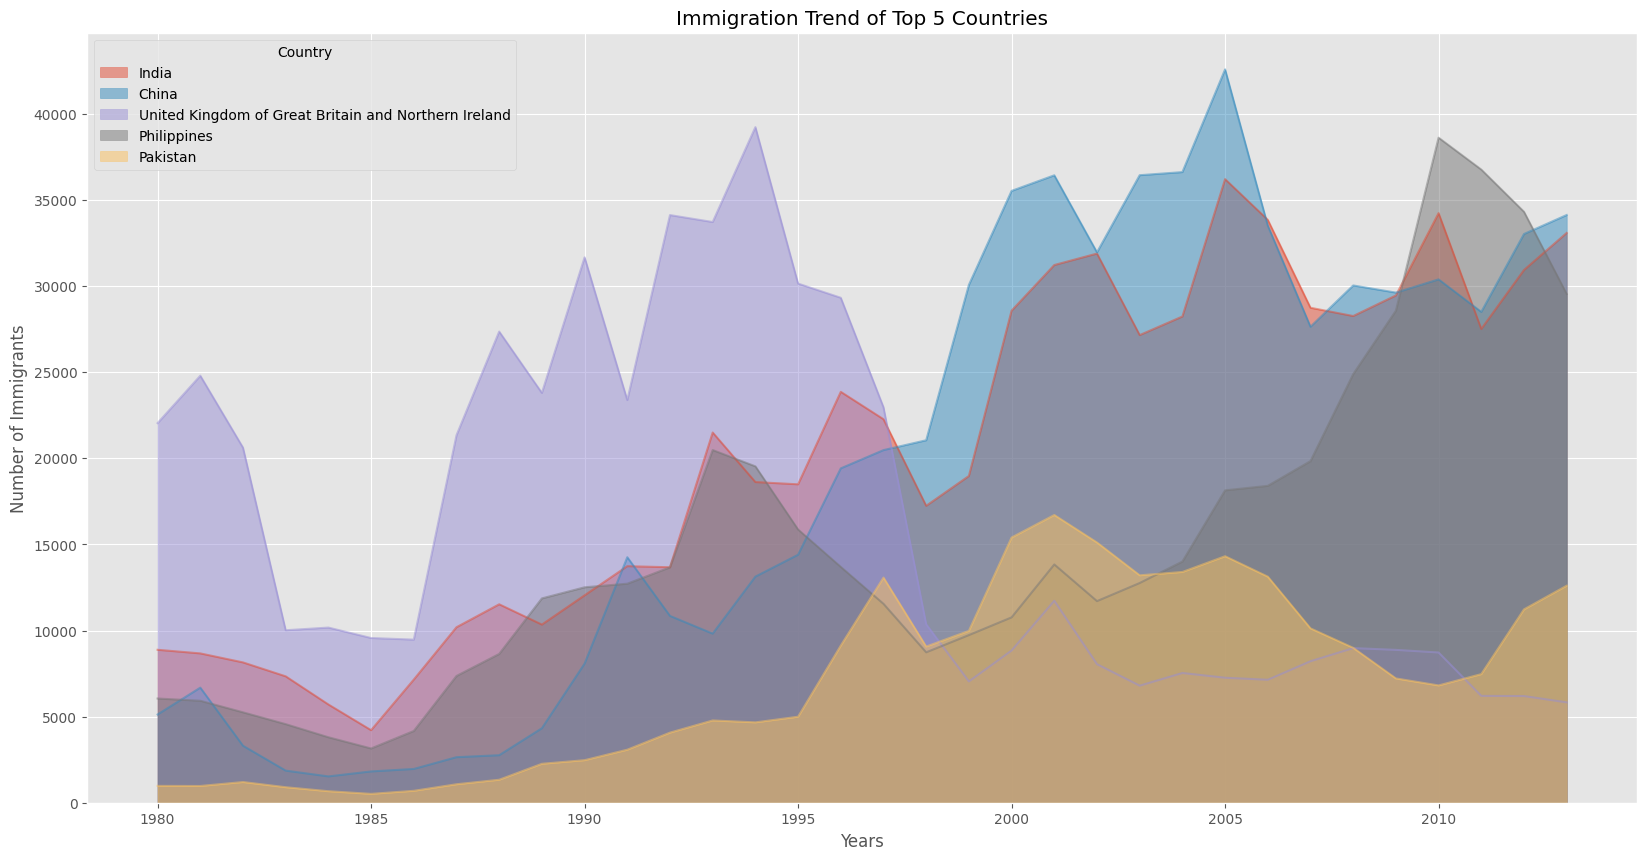

In [83]:
#Visualization
dataset_top5.plot(kind='area', stacked=False, figsize=(20, 10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()


**What will happen if we choose a stacked plot?**<br>Let's see

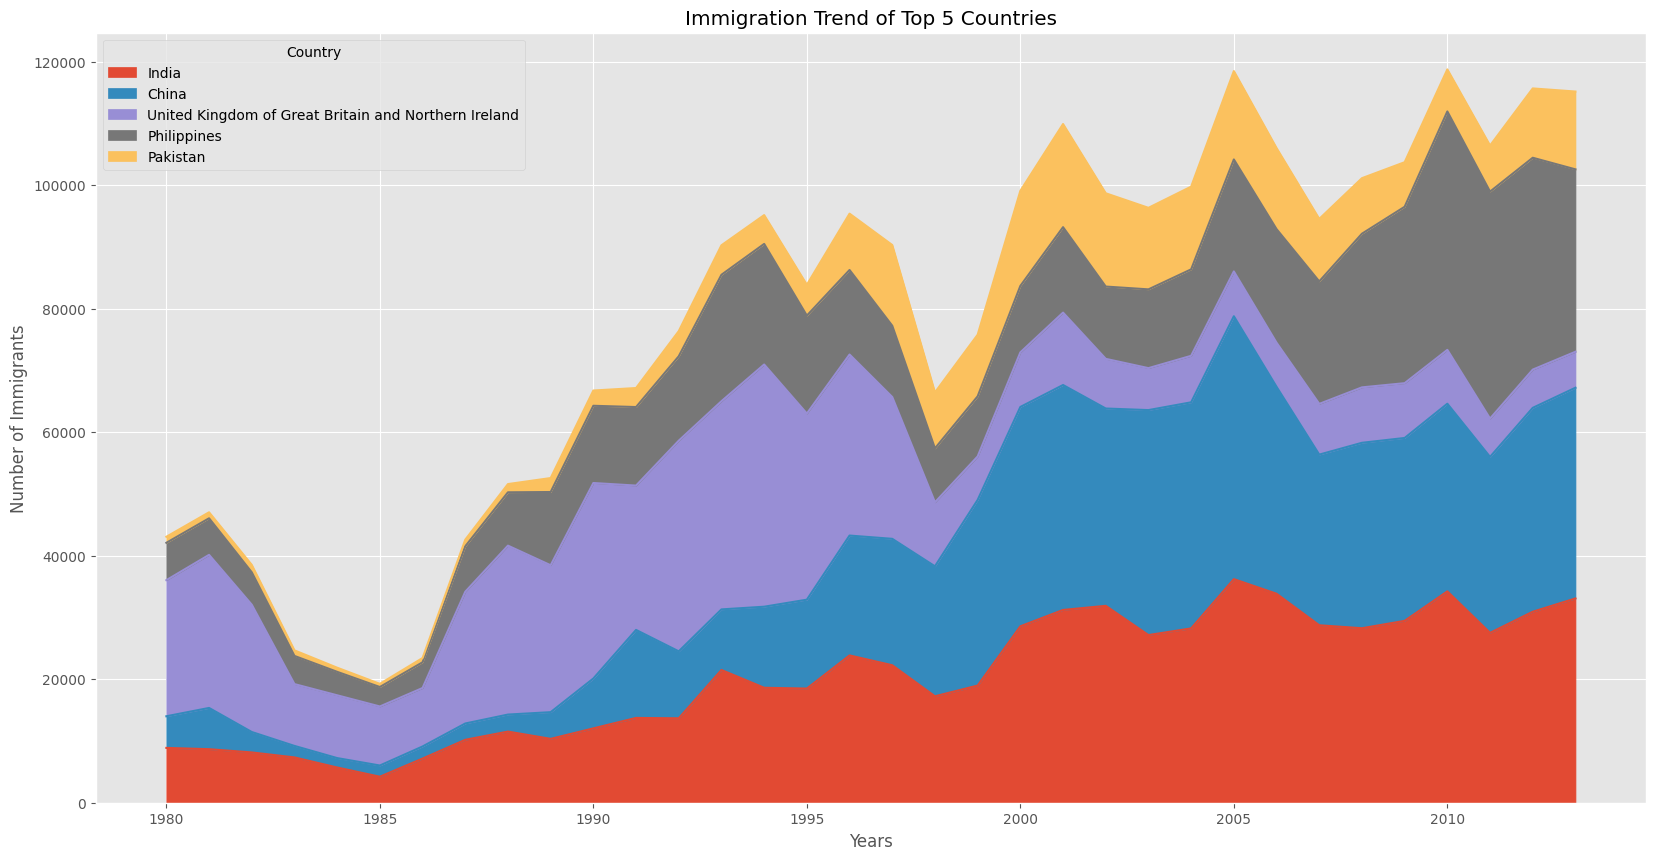

In [84]:
dataset_top5.plot(kind='area', stacked=True, figsize=(20, 10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

So it is clear from both images that we will get a better visibility if we use `stack=False`<br>
The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.



Text(0.5, 0, 'Years')

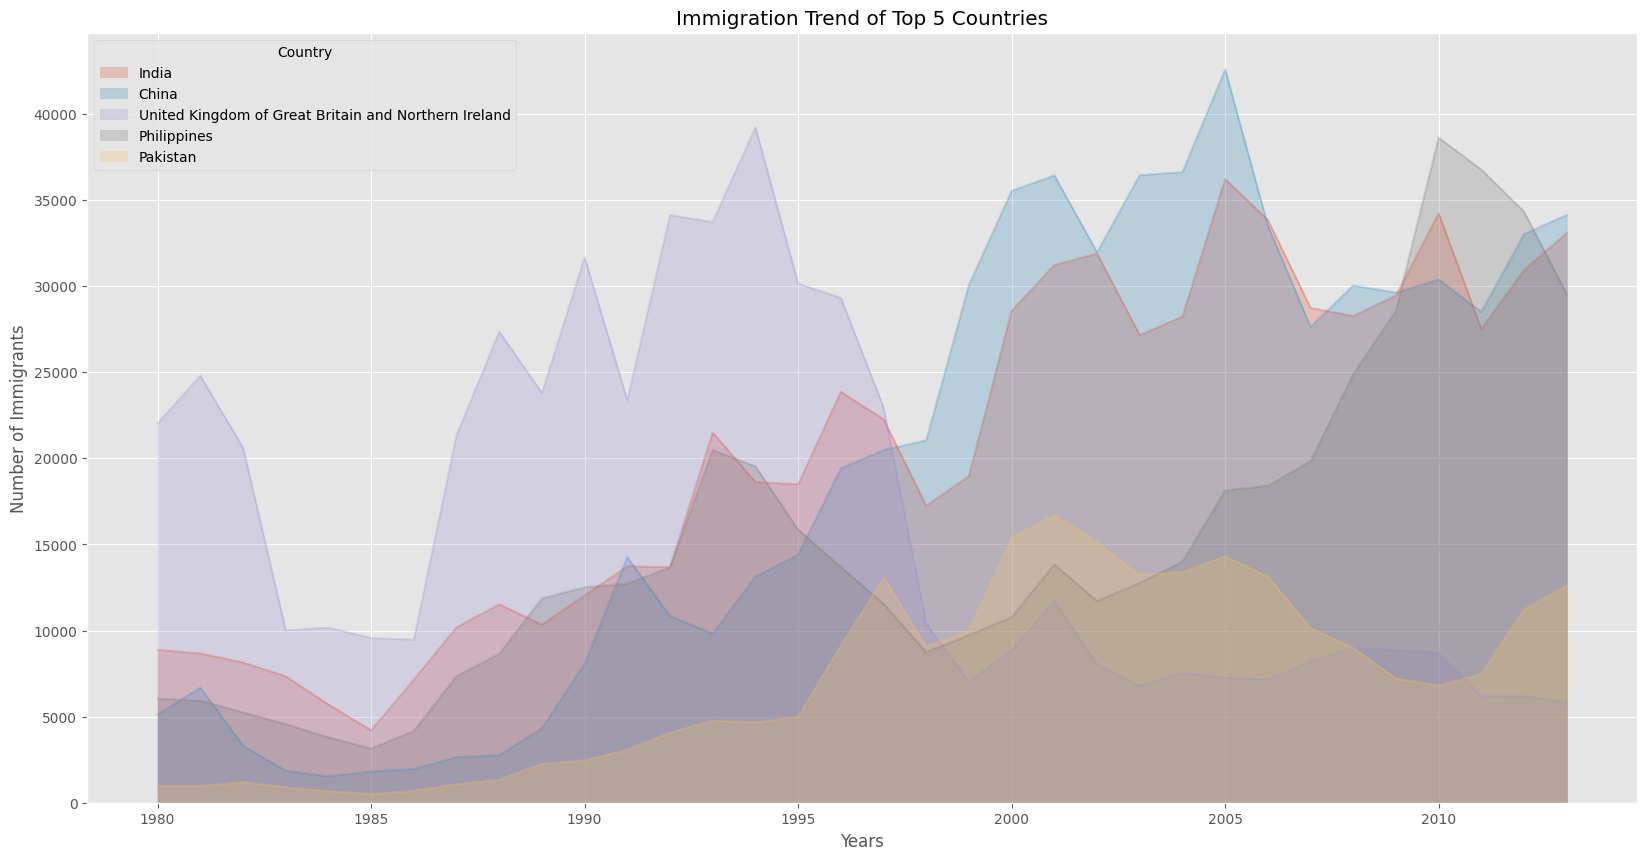

In [85]:
dataset_top5.plot(kind='area', alpha=0.25, stacked=False, figsize=(20, 10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

We can also use an Axes instance to set plot elements, rather than relying solely on pyplot’s global functions. It offers a more object-oriented approach that improves code clarity and flexibility. By storing the Axes object in a variable (e.g., ax), you can call methods like ax.set_title() and ax.set_xlabel() to directly modify your plot’s properties. This approach is especially beneficial when dealing with multiple subplots or advanced customizations, as it allows for granular control over each individual plot component, making your code more transparent and easier to manage.<br>
***Let's see an example and learn to use Axes instance***

Text(0.5, 0, 'Years')

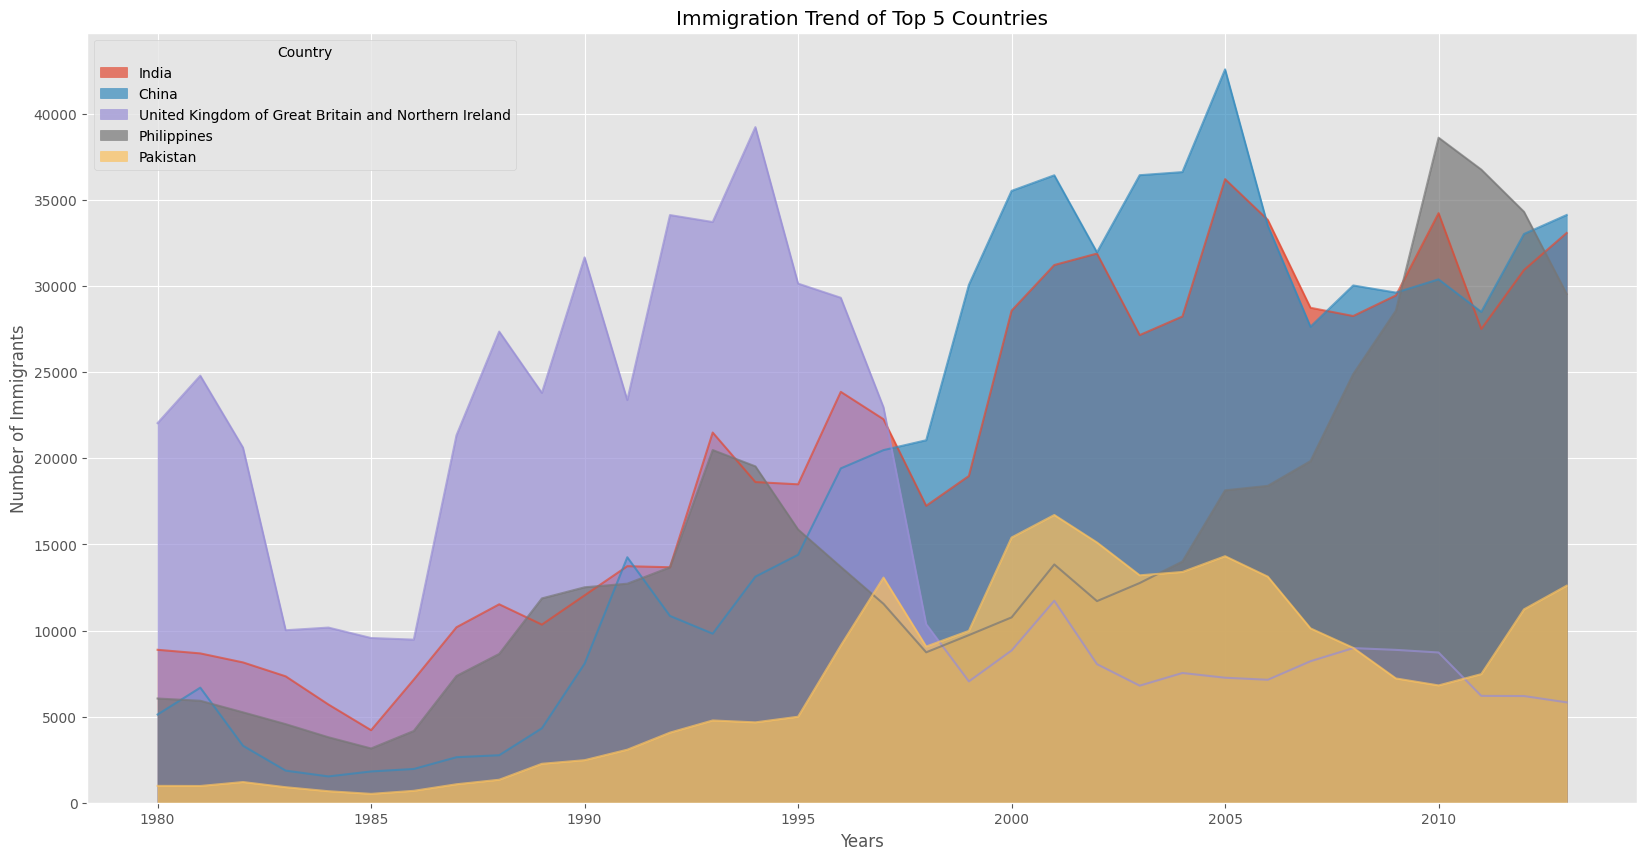

In [87]:
ax = dataset_top5.plot(kind='area', alpha=0.7, stacked=False, figsize=(20, 10))
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')